# Handwritting Recognition

### Importing models and dataset 

In [8]:
from tkinter import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,GRU
from keras.datasets import mnist
from keras.models import Sequential
from keras import backend as K
import tensorflow as tf

In [9]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
print(x_train.shape)

(60000, 28, 28)


In [11]:
print(y_train.shape)

(60000,)


In [12]:
x_train[:,1:2]

array([[[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

### Preprocessing

In [13]:
x_train2 = x_train.reshape(x_train.shape[0],28,28,1)
x_test2 = x_test.reshape(x_test.shape[0],28,28,1)

In [14]:
input = (28,28,1)

In [15]:
y_train2 = keras.utils.to_categorical(y_train,10)
y_test2 = keras.utils.to_categorical(y_test,10)

In [16]:
x_train2 = x_train2.astype('float32')
x_test2 = x_test2.astype('float32')

In [17]:
x_train2 = x_train2/255
x_test2 = x_test2/255

In [18]:
x_train2.shape

(60000, 28, 28, 1)

In [19]:
x_test2.shape

(10000, 28, 28, 1)

In [20]:
y_train2.shape

(60000, 10)

In [21]:
y_test2.shape

(10000, 10)

## CNN

In [22]:
bs = 64
e=10
num_classes = 10

In [23]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [24]:
history=model.fit(x_train2,y_train2,batch_size=bs,epochs=e,validation_data=(x_test2,y_test2))

Epoch 1/10
938/938 [==============================] - 37s 5ms/step - loss: 0.7753 - accuracy: 0.7371 - val_loss: 0.0560 - val_accuracy: 0.9840
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1152 - accuracy: 0.9686 - val_loss: 0.0319 - val_accuracy: 0.9900
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0802 - accuracy: 0.9786 - val_loss: 0.0315 - val_accuracy: 0.9899
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0627 - accuracy: 0.9834 - val_loss: 0.0262 - val_accuracy: 0.9925
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0455 - accuracy: 0.9877 - val_loss: 0.0257 - val_accuracy: 0.9924
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0403 - accuracy: 0.9895 - val_loss: 0.0276 - val_accuracy: 0.9915
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0379 - accuracy: 0.9900 - val_loss: 0.0282 - val_accuracy: 0.9922
Epoch

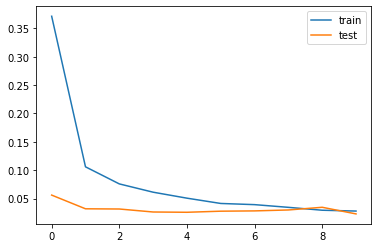

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [26]:
s = model.evaluate (x_test2,y_test2)
s[0]=s[0]*100
s[1]=s[1]*100
print('Test loss:', s[0])
print('Test accuracy:', s[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0228 - accuracy: 0.9944
Test loss: 2.2839952260255814
Test accuracy: 99.44000244140625


In [27]:
model.save('mnist_cnn.h5')

Saving 7.png to 7.png


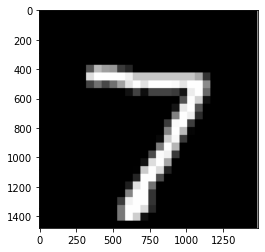

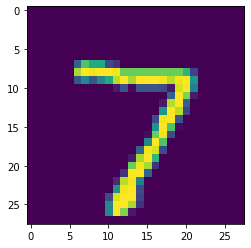

7
100


In [52]:
from google.colab import files
from io import BytesIO
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.models import load_model

upload = files.upload()
im = Image.open(BytesIO(upload['7.png']))

m = load_model("mnist_cnn.h5")

plt.imshow(im)
plt.show()

img = im.resize((28,28))
img = img.convert('L')
img = np.array(img)
plt.imshow(img)
plt.show()


img = img.reshape(1, 28, 28, 1)
img = img / 255.0

result = m.predict(img)[0]
r = np.argmax(result)
r1 = np.max(result)
print(str(r))
print(str(int(r1*100)))

## GRU

In [53]:
x_train1 = x_train.reshape(x_train.shape[0],28,x_train.shape[1])
x_test1 = x_test.reshape(x_test.shape[0],28,x_test.shape[1])

In [54]:
x_train1.shape

(60000, 28, 28)

In [55]:
y_train1 = y_train.reshape(y_train.shape[0],1,1)
y_test1 = y_test.reshape(y_test.shape[0],1,1)

In [56]:
y_train1.shape

(60000, 1, 1)

In [57]:
import warnings
warnings.filterwarnings("ignore")

epochs = 5

model1 = Sequential()

model1.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[0],x_train.shape[1])))
model1.add(Dropout(0.3))
model1.add(GRU(units=5,return_sequences=True))
model1.add(Dropout(0.3))
model1.add(GRU(units=50,return_sequences=True))
model1.add(Dropout(0.3))
model1.add(GRU(units=50))
model1.add(Dropout(0.3))
model1.add(Dense(units=9))

model1.compile(optimizer='adam',loss='mse',metrics= ['accuracy'])

history=model1.fit(x_train1,y_train1, batch_size = 32, epochs = epochs,validation_data=(x_test1, y_test1))

Epoch 1/5
1875/1875 [==============================] - 20s 9ms/step - loss: 7.5770 - accuracy: 0.1020 - val_loss: 2.1891 - val_accuracy: 0.1189
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 2.5388 - accuracy: 0.1071 - val_loss: 1.5727 - val_accuracy: 0.0943
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 1.9388 - accuracy: 0.0878 - val_loss: 1.1762 - val_accuracy: 0.0667
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 1.6276 - accuracy: 0.0841 - val_loss: 1.0903 - val_accuracy: 0.0467
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 1.4253 - accuracy: 0.0813 - val_loss: 0.9636 - val_accuracy: 0.0299


In [58]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60000, 50)         12000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60000, 50)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, 60000, 5)          855       
_________________________________________________________________
dropout_3 (Dropout)          (None, 60000, 5)          0         
_________________________________________________________________
gru_2 (GRU)                  (None, 60000, 50)         8550      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60000, 50)         0         
_________________________________________________________________
gru_3 (GRU)                  (None, 50)               

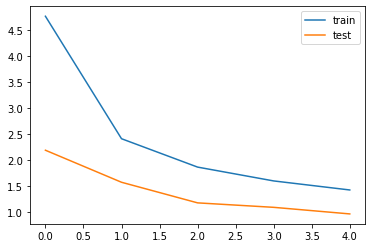

In [59]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [60]:
s1 = model1.evaluate (x_test,y_test)
s1[0]=s1[0]*100
s1[1]=s1[1]*100
print('Test loss:', s1[0])
print('Test accuracy:', s1[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.9636 - accuracy: 0.0299
Test loss: 96.3570237159729
Test accuracy: 2.9899999499320984


In [61]:
model1.save('mnist_gru.h5')